<a href="https://colab.research.google.com/github/bert13069598/Advanced-AI/blob/master/Lecture21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)
batch_size=4
trainset=torchvision.datasets.CIFAR10(root='./data', train=True,
                                      download=True, transform=transform)
trainloader=torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)
testset=torchvision.datasets.CIFAR10(root='./data', train=False,
                                      download=True, transform=transform)
testloader=torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                       shuffle=False, num_workers=2)
classes=('plane','car','bird','cat',
         'deer','dog','frog','horse','ship','truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


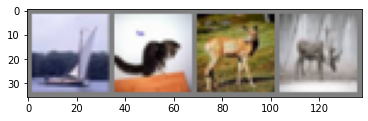

ship  cat   deer  deer 


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img=img/2+0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

dataiter = iter(trainloader)
images, labels=next(dataiter)

imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,6,5)
    self.pool=nn.MaxPool2d(6,16,5)
    self.fc1=nn.Linear(16*5*5,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)

  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=torch.flatten(x,1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x

net=Net()

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)